# 1.Download the Dataset

In [ ]:
pwd

**Load** **the** **image** **dataset**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd//content/drive/MyDrive

/content/drive/MyDrive


In [10]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [11]:
pwd

'/content/drive/MyDrive'

# 2.Image Augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip =True,zoom_range=0.2)

In [14]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
pwd

'/content/drive/MyDrive'

In [20]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size = (64,64),class_mode = "categorical",batch_size = 24) 

Found 4317 images belonging to 5 classes.


In [21]:
x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size = (64,64), class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [22]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# 3.Create Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [28]:
model=Sequential()

# 4.Add Layers(Convolution,Maxpooling,Flatten)

In [29]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [30]:
32*(3*3*3+1)

896

**Hidden** **Layers**

In [31]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

**Output Layers**

In [32]:
model.add(Dense(5,activation='softmax'))

# 5.Compile the Model

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
len(x_train)

180

In [35]:
4317/24

179.875

# 6.Fit the Model

In [36]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 806s 4s/step - loss: 1.3457 - accuracy: 0.4429 - val_loss: 1.1535 - val_accuracy: 0.5388
Epoch 2/10
180/180 [==============================] - 66s 369ms/step - loss: 1.0656 - accuracy: 0.5742 - val_loss: 1.0816 - val_accuracy: 0.5673
Epoch 3/10
180/180 [==============================] - 69s 382ms/step - loss: 0.9836 - accuracy: 0.6104 - val_loss: 1.0118 - val_accuracy: 0.6083
Epoch 4/10
180/180 [==============================] - 67s 370ms/step - loss: 0.9146 - accuracy: 0.6454 - val_loss: 0.8813 - val_accuracy: 0.6595
Epoch 5/10
180/180 [==============================] - 71s 393ms/step - loss: 0.8863 - accuracy: 0.6528 - val_loss: 1.1208 - val_accuracy: 0.5981
Epoch 6/10
180/180 [==============================] - 69s 385ms/step - loss: 0.8470 - accuracy: 0.6722 - val_loss: 0.8717 - val_accuracy: 0.6727
Epoch 7/10
180/180 [==============================] - 67s 370ms/step - loss: 0.8352 - accuracy: 0.6769 - val_loss: 0.7951 - val_accu

# 7.Save the Model

In [37]:
model.save('flowers.h5')

In [38]:
ls flowers/

daisy/  dandelion/  rose/  sunflower/  tulip/


# 8.Test the Model

In [40]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [41]:
model=load_model('flowers.h5')

In [43]:
img=image.load_img('/content/drive/MyDrive/flowers/tulip/10128546863_8de70c610d.jpg')

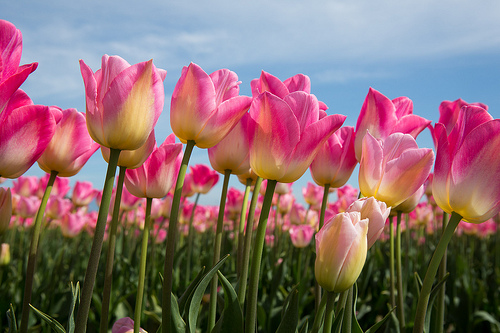

In [44]:
img

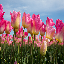

In [45]:
img=image.load_img('/content/drive/MyDrive/flowers/tulip/10128546863_8de70c610d.jpg',target_size=(64,64))
img

In [46]:
x=image.img_to_array(img)

In [47]:
x

array([[[133., 163., 197.],
        [134., 165., 196.],
        [134., 165., 196.],
        ...,
        [177., 195., 215.],
        [177., 195., 215.],
        [181., 198., 216.]],

       [[132., 162., 198.],
        [133., 163., 197.],
        [135., 165., 199.],
        ...,
        [178., 196., 218.],
        [177., 195., 215.],
        [181., 198., 216.]],

       [[130., 163., 196.],
        [136., 167., 196.],
        [131., 166., 198.],
        ...,
        [177., 195., 217.],
        [178., 196., 216.],
        [182., 199., 217.]],

       ...,

       [[  0.,   9.,   6.],
        [ 31.,  30.,   2.],
        [ 30.,  43.,  23.],
        ...,
        [ 28.,  42.,   6.],
        [ 93., 107.,  81.],
        [ 21.,  31.,   6.]],

       [[  0.,  10.,   2.],
        [ 29.,  35.,   1.],
        [ 67.,  89.,  51.],
        ...,
        [  3.,  10.,   2.],
        [  3.,   9.,   5.],
        [ 30.,  43.,   0.]],

       [[  0.,   8.,   3.],
        [ 23.,  32.,   1.],
        [ 36.,  

In [48]:
x=np.expand_dims(x,axis=0)

In [49]:
x

array([[[[133., 163., 197.],
         [134., 165., 196.],
         [134., 165., 196.],
         ...,
         [177., 195., 215.],
         [177., 195., 215.],
         [181., 198., 216.]],

        [[132., 162., 198.],
         [133., 163., 197.],
         [135., 165., 199.],
         ...,
         [178., 196., 218.],
         [177., 195., 215.],
         [181., 198., 216.]],

        [[130., 163., 196.],
         [136., 167., 196.],
         [131., 166., 198.],
         ...,
         [177., 195., 217.],
         [178., 196., 216.],
         [182., 199., 217.]],

        ...,

        [[  0.,   9.,   6.],
         [ 31.,  30.,   2.],
         [ 30.,  43.,  23.],
         ...,
         [ 28.,  42.,   6.],
         [ 93., 107.,  81.],
         [ 21.,  31.,   6.]],

        [[  0.,  10.,   2.],
         [ 29.,  35.,   1.],
         [ 67.,  89.,  51.],
         ...,
         [  3.,  10.,   2.],
         [  3.,   9.,   5.],
         [ 30.,  43.,   0.]],

        [[  0.,   8.,   3.],
       

In [50]:
y=np.argmax(model.predict(x),axis=1)
y

array([4])

In [51]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [52]:
index=['daisy','dandelion','rose','sunflower','tuple']

In [53]:
index[y[0]]

'tuple'

In [74]:
img=image.load_img('/content/drive/MyDrive/flowers/dandelion/10617162044_8740d4dd9f_n.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['sunflower','daisy','rose','dandelion','tuple']
index[y[0]]


'dandelion'

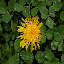

In [75]:
img

In [77]:
img=image.load_img('/content/drive/MyDrive/flowers/rose/11944957684_2cc806276e.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['sunflower','daisy','rose','dandelion','tuple']
index[y[0]]

'rose'

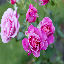

In [78]:
img

In [83]:
img=image.load_img('/content/drive/MyDrive/flowers/sunflower/1008566138_6927679c8a.jpg',target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['dandelion','daisy','rose','sunflower','tuple']
index[y[0]]


'sunflower'

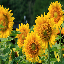

In [84]:
img